<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Hackathon3b_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

Automated facial expression recognition provides an objective assessment of emotions. Human based assessment of emotions has many limitations and biases and automated facial expression technology has been found to deliver a better level of insight into behavior patterns. Emotion detection from facial expressions using AI is useful in automatically measuring consumers’ engagement with their content and brands, audience engagement for advertisements, customer satisfaction in the retail sector, psychological analyses, law enforcement etc.

In [ ]:
#@title Explanation Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Hackathon3b_expression_recognition.mp4" type="video/mp4">
</video>
""")

**Objectives:**

**Stage 4 (15 Marks):** Train a CNN Model and perform Expression Recognition in the EFR Mobile App.

**Stage 5 (5 Marks):** Test for Anti-Face Spoofing on the EFR Mobile App.

##**Stage 4 (15 Marks)**

**(i) Train a CNN Model for Expression Recognition on given Expression data  
(ii) Deploy the Model and Perform Expression Recognition on Team Data through the EFR Mobile App**


---


* Define and train a CNN for expression recognition for the data under folder "Expression_data" which segregated on expression basis.
* Collect your team data using EFR application and test your model on the same and optimize the CNN architecture for predicting the respective labels of the images.
* Save and Download the trained expression model and upload them in the ftp server (refer to [Filezilla Installation and Configuration document](https://drive.google.com/file/d/19UIKpyVK4r12Dxklo8quQdZQ31PWpiKM/view?usp=drive_link)).

* Update the **“exp_recognition.py”** file in the server. Open the files in the terminal (Command prompt) and provide the code for predicting the expression on the face (Note: To define the architecture of your trained model, you'll need to define it in the file **"exp_recognition_model.py"**).

* Test your model on the mobile app for Expression Recognition and Sequence Expression. Your team can also see your results in your terminal.


* Grading Scheme:
> * Expression Recognition (12M): If the functionality is returning expression class correctly for the face using the mobile app’s “Expression Recognition” functionality
> * Sequence Expression (3M): Get three consecutive correct Expressions using the mobile app’s “Sequence Expressions” functionality

**Download the dataset**

In [1]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="M3_Hackathon" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Expression_data.zip")

    ipython.magic("sx unzip Expression_data.zip")

    ipython.magic("sx pip install torch==1.0.1 -f https://download.pytorch.org/whl/cu100/stable")
    ipython.magic("sx pip install torchvision==0.2.1")
    ipython.magic("sx pip install opencv-python")
    print ("Setup completed successfully")
    return
setup()

Setup completed successfully


**Dataset attributes:**

During the setup you have downloaded the Expression data:

* **Expression_data**: In this folder, the images are segregrated in terms of Expression
> * Expressions available: ANGER, DISGUST, FEAR, HAPPINESS, NEUTRAL, SADNESS, SURPRISE
> * Each class is organised as one folder
> * There are ~18000 total images in the training data and ~4500 total images in the testing data

In [ ]:
%ls

In [1]:
!pip install "pillow<7"

**Imports: All the imports are defined here**



In [2]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset,ConcatDataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import os
import warnings
from time import sleep
import sys
warnings.filterwarnings('ignore')

For the following step, to obtain hints on building a CNN model for face expression, you may refer to this [article](https://drive.google.com/open?id=1P2rpaWW3tOtGGnw4dvtdZ4hjoc8iDNst)

**Define and train a CNN model for expression recognition**

In [3]:
# YOUR CODE HERE to define and train CNN model for Expression_Data.

class Config():
    training_dir = "./Expression_data/Facial_expression_train"
    testing_dir = "./Expression_data/Facial_expression_test"
    train_batch_size = 64
    train_number_epochs = 100

import collections # Import Iterable from collections.abc

if not hasattr(collections, 'Iterable'):
    collections.Iterable = collections.abc.Iterable

#  transforms.Resize(250,250)
tranformer = transforms.Compose([
    transforms.Resize((250, 250)), # Resize should be done before converting to Tensor
    transforms.ToTensor()
])

expData= dset.ImageFolder(root=Config.training_dir, transform=tranformer)


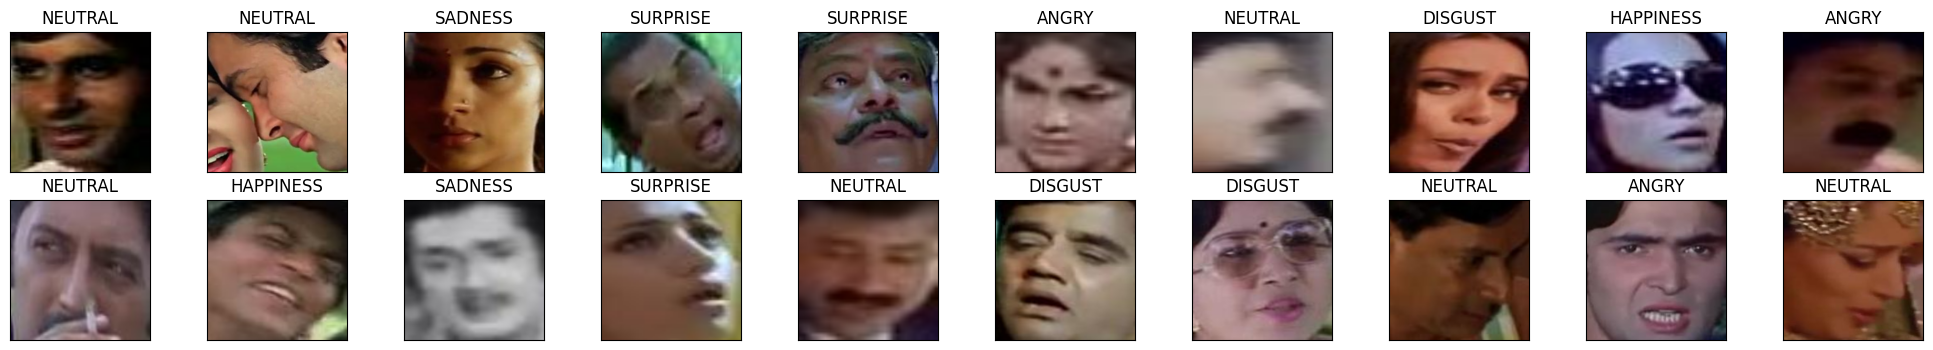

In [4]:
dataSet = DataLoader(expData, batch_size=32, shuffle=True)


dataiter = iter(dataSet)

images, labels = next(dataiter)

labelsNames={0:'ANGRY',1:'DISGUST',2:'FEAR',3:'HAPPINESS',4:'NEUTRAL',5:'SADNESS',6:'SURPRISE'}


fig= plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
  avg_image = np.transpose(images[idx], (1, 2, 0))
  ax.imshow(np.squeeze(avg_image), cmap='gray')
  ax.set_title(labelsNames[labels[idx].item()])



In [4]:
!wget -nH --recursive --no-parent --reject 'index.*' https://aiml-sandbox.talentsprint.com/expression_detection/b23h4g09/captured_images_with_Expression/ --cut-dirs=3  -P ./captured_face_images

Streaming output truncated to the last 5000 lines.
Length: 8096 (7.9K) [image/jpeg]
Saving to: ‘./captured_face_images/SADNESS/SADNESS_1731750380 - Copy - Copy (3).jpg’

SADNESS/SADNESS_173 100%[===================>]   7.91K  --.-KB/s    in 0s      

2024-11-17 14:56:03 (4.15 GB/s) - ‘./captured_face_images/SADNESS/SADNESS_1731750380 - Copy - Copy (3).jpg’ saved [8096/8096]

--2024-11-17 14:56:03--  https://aiml-sandbox.talentsprint.com/expression_detection/b23h4g09/captured_images_with_Expression/SADNESS/SADNESS_1731750380%20-%20Copy%20-%20Copy%20%284%29%20-%20Copy.jpg
Reusing existing connection to aiml-sandbox.talentsprint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 8096 (7.9K) [image/jpeg]
Saving to: ‘./captured_face_images/SADNESS/SADNESS_1731750380 - Copy - Copy (4) - Copy.jpg’

SADNESS/SADNESS_173 100%[===================>]   7.91K  --.-KB/s    in 0s      

2024-11-17 14:56:03 (4.15 GB/s) - ‘./captured_face_images/SADNESS/SADNESS_1731750380 - Copy - Copy (4) 

In [17]:
teamData= dset.ImageFolder("./captured_face_images",transform=tranformer)

In [18]:
alldata=ConcatDataset([teamData,expData])

**Test your model and optimize CNN architecture for predicting the labels correctly**

In [19]:
# YOUR CODE HERE for test evaluation
dataSet = DataLoader(alldata, batch_size=32, shuffle=True)

In [20]:
split=0.25
test_size= int(split * len(alldata))
train_size= len(alldata) - test_size
train_dataset, test_dataset = torch.utils.data.random_split(alldata, [train_size, test_size])



In [23]:
for data in dataSet:
  print(data)
  break


TypeError: img should be PIL Image. Got <class 'torch.Tensor'>

In [ ]:
class CNN(nn.module):
  def __init__(self):
    super(CNN,self).__init__()


**Team Data Collection (activate the server first)**

  - (This can be done on the day of the Hackathon once the login username and password are given)

Activate the Server Access
* Open the terminal (Command Prompt)
* Login to SSH by typing **ssh (username)@aiml-sandbox1.talentsprint.com**. Give the login username which is given to you.

Eg: `ssh b16h3gxx@aiml-sandbox1.talentsprint.com`

  (If it is your first time connecting to the server from this computer, accept the connection by typing "yes".)
* After logging into SSH, please activate your virtual environment using the
command **source venv/bin/activate** and then press enter
* You can start the server by giving the command **sh runserver.sh** and then press enter.
* In order to collect team data in mobile app, ensure the server is active


**Collect your team data using the EFR Mobile App and fine-tune the CNN for expression data on your team**

Team Data Collection

* Follow the "Mobile_APP_Documentation" to collect the Expression photos of your team. These will be stored in the server to which login is provided to you.

[Mobile_APP_Documentation](https://drive.google.com/file/d/1F9SU-BwKViK_eZV2-P3pymvGUILUoVFf/view?usp=drive_link)


**Download your team expression data from the EFR app into your colab notebook using the links provided below**

NOTE: Replace the string "username" with your login username (such as b16h3gxx) in the below cell for expression images.

This data will be useful for testing the above trained cnn networks.

In [ ]:
!wget -nH --recursive --no-parent --reject 'index.*' https://aiml-sandbox.talentsprint.com/expression_detection/username/captured_images_with_Expression/ --cut-dirs=3  -P ./captured_images_with_Expression

In [ ]:
%ls

In [ ]:
# YOUR CODE HERE for loading the team expression data. Note: Use the same transform which used for Expression_Data.
# YOU CODE HERE for Dataloader

In [ ]:
# YOUR CODE HERE for getting the CNN representation of your team data with expression. Optimize the CNN model for predicting the labels of expressions correctly
# Note: If the CNN Model is not performing as expected, then you can add your Team Data to the Existing Training Data and Re-Train the Model.

**Save your trained model**

* Save the state dictionary of the classifier (use pytorch only), It will be useful in
integrating model to the mobile app

 [Hint](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [ ]:
### YOUR CODE HERE for saving the CNN model

**Download your trained model**
* Given the path of model file the following code downloads it through the browser

In [ ]:
from google.colab import files
files.download('<model_file_path>')

##**Stage 5 (Anti Face Spoofing): (5 marks)**


---



The objective of anti face spoofing is to be able to unlock (say) a screen not just by your image
(which can be easily be spoofed with a photograph of yours) but by a switch in the expression
demanded by the Mobile App (which is much less probable to mimic)
* **Grading scheme**:
> * **Anti Face Spoofing**: (5M Only if both the cases mentioned below are achieved)
>>* **Unlock**: Correct face + Correct Demanded Expression
>>* **Stay Locked**: Correct face + Incorrect Demanded Expression (as you might imagine there are multiple other such possibilities, which you are free to explore)

In [ ]:
# Test in your mobile app and see if it gets unlock.